Lab02
=======
    
    
# 분류 연습문제
이번 실습 수업에서 배운 분류의 연습문제로 Wine data, 와인 데이터를 분류 해보겠습니다.
오늘 배운 실습 예제 코드를 기반으로 분류를 수행해보시면 됩니다.
k-NN, Decision Tree, Logistic Regression 중 하나를 골라 수행하고 이를 평가해보시면 됩니다.

In [9]:
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
from os.path import join

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

# 1. 데이터 살펴보기

이번에 실습에 사용될 데이터는 1일차 클러스터링에 사용된 와인 데이터를 사용합니다.

변수로는 알콜 도수, 신맛 성분, 무기물 비율, 무기물의 염기성 정도, 마그네슘 함량, 페놀 량, 플라보노이드에 속하는 페놀 성분 등이 있고

분류해야할 결과 값으로는 와인의 등급으로 1,2,3으로 되어있습니다.

In [24]:
columns = list()
with open(join('data', 'wine_attributes.txt'), 'r') as f:
    columns = f.read().split('\n')

wine = pds.read_csv(join('data', 'wine.txt'), names = columns)

wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
wine_first = wine.loc[wine['Class'] == 1]
wine_second = wine.loc[wine['Class'] == 2]
wine_third = wine.loc[wine['Class'] == 3]

## Box plot으로 분포 확인해보기

각 클래스에 해당하는 데이터의 분포들을 박스플롯으로 나타내었습니다

각 데이터의 분포를 살펴보세요

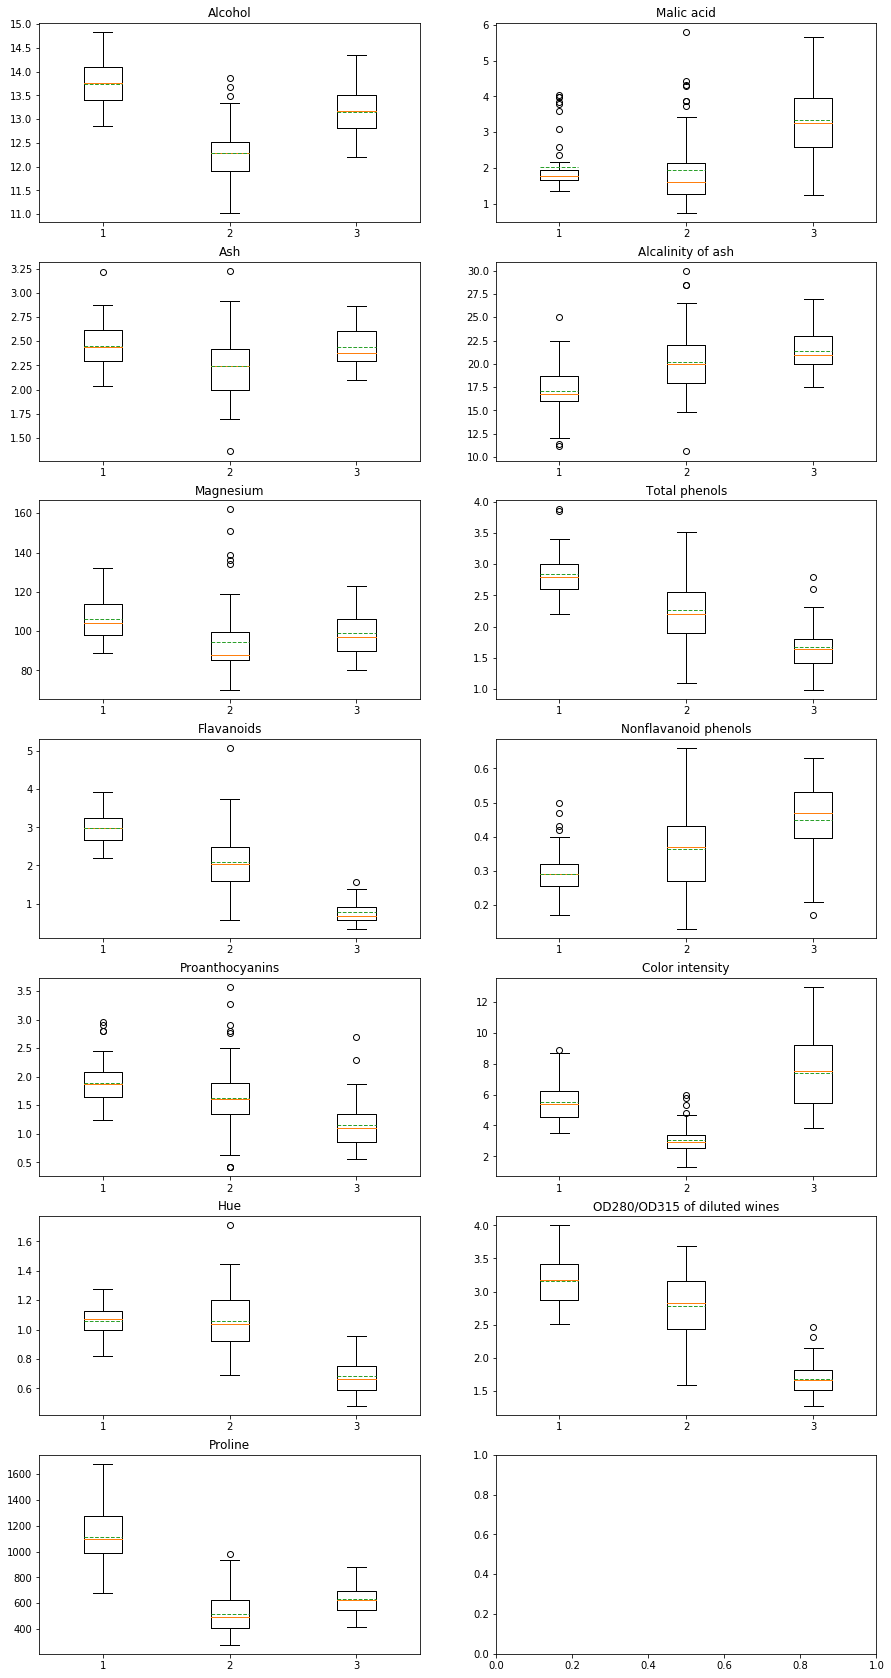

In [27]:
fig, ax = plt.subplots(7, 2, figsize=(15,30))

columns= wine.keys()[1:]
count=0
for row in range(7):
    for col in range(2):
        if count==len(columns):
            break
        attribute_name = columns[count]
        ax[row][col].boxplot([wine_first[attribute_name], 
                               wine_second[attribute_name], 
                               wine_third[attribute_name]],
                   labels = ['1', '2', '3'],
                   meanline = True,
                   showmeans = True)
        ax[row][col].set(title=attribute_name)
        count+=1

# 2. 간단한 전처리하기
X에는 우리가 분류에 사용할 데이터들을 y에는 분류한 결과인 와인 등급을 저장합니다.

In [26]:
y = wine['Class']
X = wine.copy()

del X['Class']

X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


위 데이터를 필요에 따라 학습용 데이터와 테스트용 데이터로 분리합니다.

test_size를 변경하여 학습용과 테스트용 데이터의 갯수를 조절해보시고, random_state도 바꿔 각 그룹에 추출하는 데이터셋 또한 바꿔보세요

In [ ]:
k=17
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = k)

scl=StandardScaler()
new_X=scl.fit_transform(X=X)

new_X_train, new_X_test, new_y_train, new_y_test = \
train_test_split(new_X, y, test_size = 0.3, random_state = k)


# 3. sklearn으로 자유롭게 분류 해보기

In [177]:
#sklearn 모델 정의
model_knn = KNeighborsClassifier()
model_dt = DecisionTreeClassifier()
model_lr = LogisticRegression()


#모델 생성
model_knn.fit(new_X_train, new_y_train)
model_dt.fit(X_train, y_train)
model_lr.fit(X_train, y_train)

/home/kyle/samsung/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kyle/samsung/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# 4. 분류 결과 출력하기
앞의 예제 코드들을 활용하여 분류한 결과를 출력해보세요.

In [178]:

print('k-Neighbors Classifier\n훈련 셋의 정확도 \t= %.4f,\n테스트 셋의 정확도 \t= %.4f\n\n'\
%(model_knn.score(new_X_train,new_y_train),accuracy_score(model_knn.predict(new_X_test),new_y_test)))
print('Logistics Regression\n훈련 셋의 정확도 \t= %.4f,\n테스트 셋의 정확도 \t= %.4f\n\n'\
%(model_dt.score(X_train,y_train),accuracy_score(model_dt.predict(X_test),y_test)))
print('Decision Tree Classifier\n훈련 셋의 정확도 \t= %.4f,\n테스트 셋의 정확도 \t= %.4f'\
%(model_lr.score(X_train,y_train),accuracy_score(model_lr.predict(X_test),y_test)))

k-Neighbors Classifier
훈련 셋의 정확도 	= 0.9516,
테스트 셋의 정확도 	= 0.9815


Logistics Regression
훈련 셋의 정확도 	= 1.0000,
테스트 셋의 정확도 	= 0.9259


Decision Tree Classifier
훈련 셋의 정확도 	= 0.9758,
테스트 셋의 정확도 	= 0.9815


# 5. 분류 평가하기

앞의 예제 코드들을 활용하여 각 분류 방법에 따라 정확도, Confusion Matrix, ROC Curve등을 그려 평가해보세요.

k-Nearest Neighbors의 Confusion Matrix

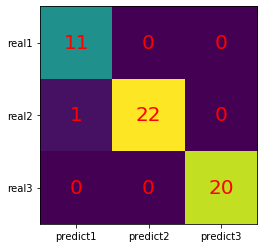

In [197]:
cfm = confusion_matrix(new_y_test, model_knn.predict(new_X_test), labels = [1,2,3])

fig, ax = plt.subplots()
im = ax.imshow(cfm)

ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))

ax.set_xticklabels(['predict'+str(i) for i in y.unique()])
ax.set_yticklabels(['real'+str(i) for i in y.unique()])

for i in range(3):
    for j in range(3):
        text = ax.text(j, i, cfm[i, j],
                       ha="center", va="center", color="r", fontsize=20)

plt.show()

Logistics Regression의 Confusion Matrix

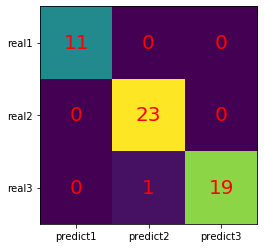

In [195]:
cfm = confusion_matrix(y_test, model_lr.predict(X_test), labels = [1,2,3])

fig, ax = plt.subplots()
im = ax.imshow(cfm)

ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))

ax.set_xticklabels(['predict'+str(i) for i in y.unique()])
ax.set_yticklabels(['real'+str(i) for i in y.unique()])

for i in range(3):
    for j in range(3):
        text = ax.text(j, i, cfm[i, j],
                       ha="center", va="center", color="r", fontsize=20)

plt.show()

Decision Tree의 Confusion Matrix

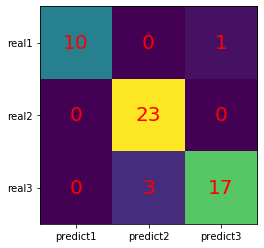

In [198]:
cfm = confusion_matrix(y_test, model_dt.predict(X_test), labels = [1,2,3])

fig, ax = plt.subplots()
im = ax.imshow(cfm)

ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))

ax.set_xticklabels(['predict'+str(i) for i in y.unique()])
ax.set_yticklabels(['real'+str(i) for i in y.unique()])

for i in range(3):
    for j in range(3):
        text = ax.text(j, i, cfm[i, j],
                       ha="center", va="center", color="r", fontsize=20)

plt.show()